<a href="https://colab.research.google.com/github/bhatiaparteek/GenAI-Workshop/blob/main/Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# 1️⃣ Install the OpenAI SDK
!pip install --quiet openai

# 2️⃣ Import libraries
from openai import OpenAI
import getpass
from google.colab import files





In [2]:
# 3️⃣ Enter your OpenAI API key
# You can get it from https://platform.openai.com/api-keys
api_key = getpass.getpass("Enter your OpenAI API key: ")
client = OpenAI(api_key=api_key)

Enter your OpenAI API key: ··········


In [3]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

print(" Uploaded:", image_path)


Saving object images.jpeg to object images.jpeg
 Uploaded: object images.jpeg


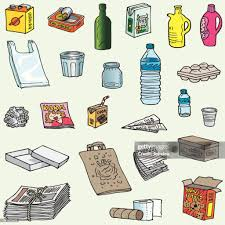

In [4]:
from PIL import Image
img = Image.open(image_path)
img


Base64 is a way of converting any file (images, PDFs, audio, binary data) into a text string made of only safe characters (A–Z, a–z, 0–9, +, /, =).

It is used because APIs cannot send raw binary files, so Base64 lets you send them as text.

In [5]:
import base64

with open(image_path, "rb") as f:
    image_bytes = f.read()

# Encode the image bytes to base64
image_base64 = base64.b64encode(image_bytes).decode("utf-8")

response = client.chat.completions.create(
    model="gpt-4o-mini",   # or "gpt-4o"
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Explain this picture in detail."},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}}
            ]
        }
    ]
)

print(response.choices[0].message.content)

The picture depicts a collection of various objects that are commonly found as waste or recyclable materials. Each item is illustrated in a colorful and cartoonish style. Here’s a detailed breakdown of the items visible:

1. **Cartons**: There are several types of cartons, including a milk carton, a juice carton, and a box that could represent takeout food. These are typically made from cardboard or Tetra Pak.

2. **Bottles**: Various plastic and glass bottles are present, including a soda bottle and a water bottle. These are common recyclable items.

3. **Containers**: There are containers made of various materials, such as a glass jar, which might be used for food storage, and a plastic container, commonly used for snacks or leftovers.

4. **Plastic Bags**: A plastic shopping bag is shown, which is often used for carrying groceries.

5. **Cans**: A can is visible, possibly depicting a food or beverage container, indicating another recyclable item.

6. **Egg Carton**: An egg carton, t

In [27]:
import base64

#  Define your question for the model
question = "What might be happening in this scene?"

# Convert the image bytes into a base64 string
#    (This is required because OpenAI accepts base64-encoded images in data URLs)
image_base64 = base64.b64encode(image_bytes).decode("utf-8")

#  Send both the question + image to the OpenAI Vision model
response = client.chat.completions.create(
    model="gpt-4o-mini",  # You can also use "gpt-4o" for richer analysis
    messages=[
        {
            "role": "user",
            "content": [
                # The user's question
                {"type": "text", "text": question},

                # The image provided as a base64 data URL
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_base64}"
                    }
                }
            ]
        }
    ]
)

#  Print the model’s interpretation of the scene
print(response.choices[0].message.content)


This scene likely depicts various types of packaging and containers, suggesting a focus on recycling, sorting, or organizing waste. The presence of different items like food containers, bottles, and paper could indicate a discussion about waste management, environmental awareness, or preparations for a project that involves cleaning up or organizing. It might also represent daily life scenarios, emphasizing consumer habits and the importance of responsible disposal.


In [28]:
import base64

#  Prompt asking the model to create a short story based on the image
story_prompt = "Write a 5-sentence creative story based on this image."

#  Convert the image bytes into a base64-encoded string
#    (Required format for sending images using OpenAI Vision models)
image_base64 = base64.b64encode(image_bytes).decode("utf-8")

#  Send the prompt + the base64 image to the OpenAI model
response = client.chat.completions.create(
    model="gpt-4o-mini",  # You can use "gpt-4o" for richer creativity
    messages=[
        {
            "role": "user",
            "content": [
                # User prompt asking for a creative story
                {"type": "text", "text": story_prompt},

                #  Attach the image as a base64 data URL
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_base64}"
                    }
                }
            ]
        }
    ]
)

#  Print the generated 5-sentence story
print(response.choices[0].message.content)


In the bustling town of Greendale, a group of discarded items held secret meetings in a forgotten alley. The milk carton, wise and seasoned, would dispense advice, while the eager water bottle dreamed of adventures beyond the trash bin. One day, they decided to host a grand recycling festival, inviting all neighborhood refuse to celebrate their hidden potential. As colorful paper and shiny cans joined in, they transformed the alley into a carnival of creativity. When the townsfolk discovered the vibrant display, they were inspired to recycle more, breathing new life into the once-overlooked treasures.
